In [2]:
import pandas as pd
import numpy as np
import os
import ast

sub = "105"
both = True # if fals look at specific session
ses = '3'
train = False # if false look at test trials
'''Test session'''
path = f"../data/Subject{sub}/{sub}Session{ses}"

In [3]:
if train:
    suff = 'TFT.csv'
    fin_blk = 'block1'
else:
    suff = 'TF.csv'
    fin_blk = 'block3'

In [4]:
try:
    dir_list = os.listdir(path)
    file = [i for i in dir_list if suff in i and fin_blk in i][-1]
    df = pd.read_csv(f'{path}/{file}')
    df = []
    for row in pd.read_csv(f'{path}/{file}')['Experiment Data']:
        row = ast.literal_eval(row)
        if row['Stim Type'] == 'opt':
        # if row['Stim Type'] == 'response':
            df.append(row)
    df = pd.DataFrame(df)
    df = df[df['Response'] != -1].reset_index()
    sub_percentage = df['Correct'].sum()/len(df)
    ml_percentage = df['Model Correct'].sum()/len(df)
    comb_percentage = df['Final Correct'].sum()/len(df)
    sub_correct_unique = np.where((df['Correct'] == True) & (df['Model Correct'] == False))[0]
    ml_correct_unique = np.where((df['Correct'] == False) & (df['Model Correct'] == True))[0]
    askrate = df['Ask ML'].sum()/len(df)
except (FileNotFoundError, IndexError):
    print(f'{fin_blk} {suff} not found')

block3 TF.csv not found


In [5]:
sub_percentage,ml_percentage,comb_percentage

NameError: name 'sub_percentage' is not defined

In [80]:
sub_correct_unique,len(sub_correct_unique),ml_correct_unique,len(ml_correct_unique)

(array([  0,  16,  29,  35,  36,  44,  47,  51,  59,  62,  69,  70,  71,
         84,  85,  86,  91,  92,  95,  96,  99, 102, 106, 108, 111, 113,
        114, 125, 128, 141, 142, 146, 148, 154, 163, 164, 168, 169, 190,
        198, 199, 202, 203, 211, 216, 219, 225, 230, 236, 255, 258, 275,
        276, 281, 286, 291, 295]),
 57,
 array([  1,   2,   9,  15,  21,  31,  34,  42,  48,  50,  54,  58,  60,
         63,  72,  74,  93,  98, 104, 112, 115, 121, 123, 129, 130, 135,
        136, 143, 151, 156, 159, 161, 165, 170, 173, 176, 179, 184, 185,
        188, 189, 192, 197, 204, 206, 210, 212, 213, 214, 217, 218, 220,
        222, 224, 227, 234, 239, 241, 257, 271, 277, 283, 296]),
 63)

In [81]:
len(np.where((df['Correct'] == True) | (df['Model Correct'] == True))[0])/len(df)

0.842809364548495

In [82]:
askrate

0.26421404682274247

try:
    dir_list = os.listdir(path)
    file = [i for i in dir_list if 'TF.csv' in i and 'block3' in i][0]
    test_df = pd.read_csv(f'{path}/{file}')
    test_df = []
    for row in pd.read_csv(f'{path}/{file}')['Experiment Data']:
        row = ast.literal_eval(row)
        if row['Stim Type'] == 'opt':
        # if row['Stim Type'] == 'response':
            test_df.append(row)
    test_df = pd.DataFrame(test_df)
    test_df = test_df[test_df['Response'] != -1].reset_index()
    sub_percentage = test_df['Correct'].sum()/len(test_df)
    ml_percentage = test_df['Model Correct'].sum()/len(test_df)
    comb_percentage = test_df['Final Correct'].sum()/len(test_df)
    sub_correct_unique = np.where((test_df['Correct'] == True) & (test_df['Model Correct'] == False))[0]
    ml_correct_unique = np.where((test_df['Correct'] == False) & (test_df['Model Correct'] == True))[0]
except (FileNotFoundError, IndexError):
    print('Block 3 TF not found')


sub_percentage,ml_percentage,comb_percentage

sub_correct_unique,len(sub_correct_unique),ml_correct_unique,len(ml_correct_unique)

len(np.where((test_df['Correct'] == True) | (test_df['Model Correct'] == True))[0])/len(test_df)

In [55]:
from scipy.stats import ttest_ind

In [83]:
ttest_ind(df['Correct'],df['Model Correct'])

Ttest_indResult(statistic=-0.5110895850193645, pvalue=0.6094775991805335)

In [87]:
df[np.where(df['Ask ML'] == True)]

KeyError: "None of [Int64Index([  1,   2,  14,  15,  19,  22,  23,  26,  30,  36,  42,  43,  47,\n             50,  52,  54,  57,  61,  66,  73,  79,  80,  81,  86,  93,  95,\n            105, 106, 111, 113, 117, 119, 121, 124, 129, 134, 135, 136, 141,\n            145, 146, 152, 155, 156, 166, 168, 173, 181, 188, 189, 190, 192,\n            196, 201, 203, 208, 210, 214, 217, 218, 230, 233, 237, 244, 245,\n            253, 256, 260, 268, 269, 272, 273, 280, 281, 285, 286, 288, 295,\n            296],\n           dtype='int64')] are in the [columns]"

In [6]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import scipy.stats
plt.rcParams.update({'font.size': 16})
passresp = {'Age':0,
 'Gender':0,
 'Highest Degree':0,
 'Hours per Week':0,
 'Marital Status':0,
 'Occupation':0,
 'Race':0,
 'Workclass':0}
keepresp = {'Age':0,
 'Gender':0,
 'Highest Degree':0,
 'Hours per Week':0,
 'Marital Status':0,
 'Occupation':0,
 'Race':0,
 'Workclass':0}
pair_val = {}
full_val = {}
pr = {}
kr = {}
prfull = {}
krfull = {}
ask = df[df['Ask ML'] == True]['Features']
noask = df[df['Ask ML'] == False]['Features']
for resp in noask:
    order = sorted(resp.keys())
    order_str = ', '.join(order)

    if ', '.join(order[:2]) not in kr:
        kr[', '.join(order[:2])] = 0

    if ', '.join(order[1:3]) not in kr:
        kr[', '.join(order[1:3])] = 0

    if ', '.join(order[::2]) not in kr:
        kr[', '.join(order[::2])] = 0

    if ', '.join(order[:2]) not in pr:
        pr[', '.join(order[:2])] = 0


    if ', '.join(order[1:3]) not in pr:
        pr[', '.join(order[1:3])] = 0


    if ', '.join(order[::2]) not in pr:
        pr[', '.join(order[::2])] = 0

    if order_str not in krfull:
        krfull[order_str] = 0
    if order_str not in prfull:
        prfull[order_str] = 0


    kr[', '.join(order[:2])] += 1
    kr[', '.join(order[1:3])] += 1
    kr[', '.join(order[::2])] += 1
    keepresp[order[0]] += 1
    keepresp[order[1]] += 1
    keepresp[order[2]] += 1
    krfull[order_str] += 1

for resp in ask:
    order = sorted(resp.keys())
    order_str = ', '.join(order)
    
    if ', '.join(order[:2]) not in pr:
        pr[', '.join(order[:2])] = 0


    if ', '.join(order[1:3]) not in pr:
        pr[', '.join(order[1:3])] = 0


    if ', '.join(order[::2]) not in pr:
        pr[', '.join(order[::2])] = 0

    if ', '.join(order[:2]) not in kr:
        kr[', '.join(order[:2])] = 0

    if ', '.join(order[1:3]) not in kr:
        kr[', '.join(order[1:3])] = 0

    if ', '.join(order[::2]) not in kr:
        kr[', '.join(order[::2])] = 0
        
        
    if order_str not in krfull:
        krfull[order_str] = 0
    if order_str not in prfull:
        prfull[order_str] = 0

        
    pr[', '.join(order[:2])] += 1
    pr[', '.join(order[1:3])] += 1
    pr[', '.join(order[::2])] += 1
    passresp[order[0]] += 1
    passresp[order[1]] += 1
    passresp[order[2]] += 1
    prfull[order_str] += 1
    
    
for i in pr:
    tot = pr[i] + kr[i]
    pr[i] /= tot
    kr[i] /= tot
for i in passresp:
    tot = passresp[i] + keepresp[i]
    passresp[i] /= tot
    keepresp[i] /= tot
for i in prfull:
    tot = prfull[i] + krfull[i]
    prfull[i] /= tot
    krfull[i] /= tot

passresp = OrderedDict(sorted(passresp.items())) # dict(sorted(passresp.items(), key=lambda item: item[1]))
keepresp = OrderedDict(sorted(keepresp.items())) #dict(sorted(keepresp.items(), key=lambda item: item[1]))
pr = OrderedDict(sorted(pr.items())) #dict(sorted(pr.items(), key=lambda item: item[1]))
kr = OrderedDict(sorted(kr.items())) #dict(sorted(kr.items(), key=lambda item: item[1]))
prfull = OrderedDict(sorted(prfull.items())) #dict(sorted(prfull.items(), key=lambda item: item[1]))
krfull = OrderedDict(sorted(krfull.items())) #dict(sorted(krfull.items(), key=lambda item: item[1]))


NameError: name 'df' is not defined

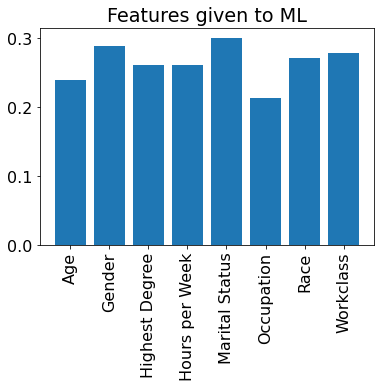

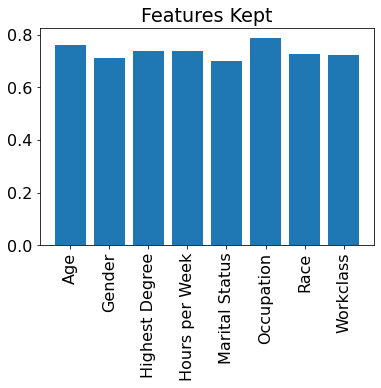

In [124]:

plt.bar(passresp.keys(),passresp.values())
plt.xticks(rotation=90)
plt.title('Features given to ML')
plt.show()


plt.bar(keepresp.keys(),keepresp.values())
plt.xticks(rotation=90)
plt.title('Features Kept')
plt.show()

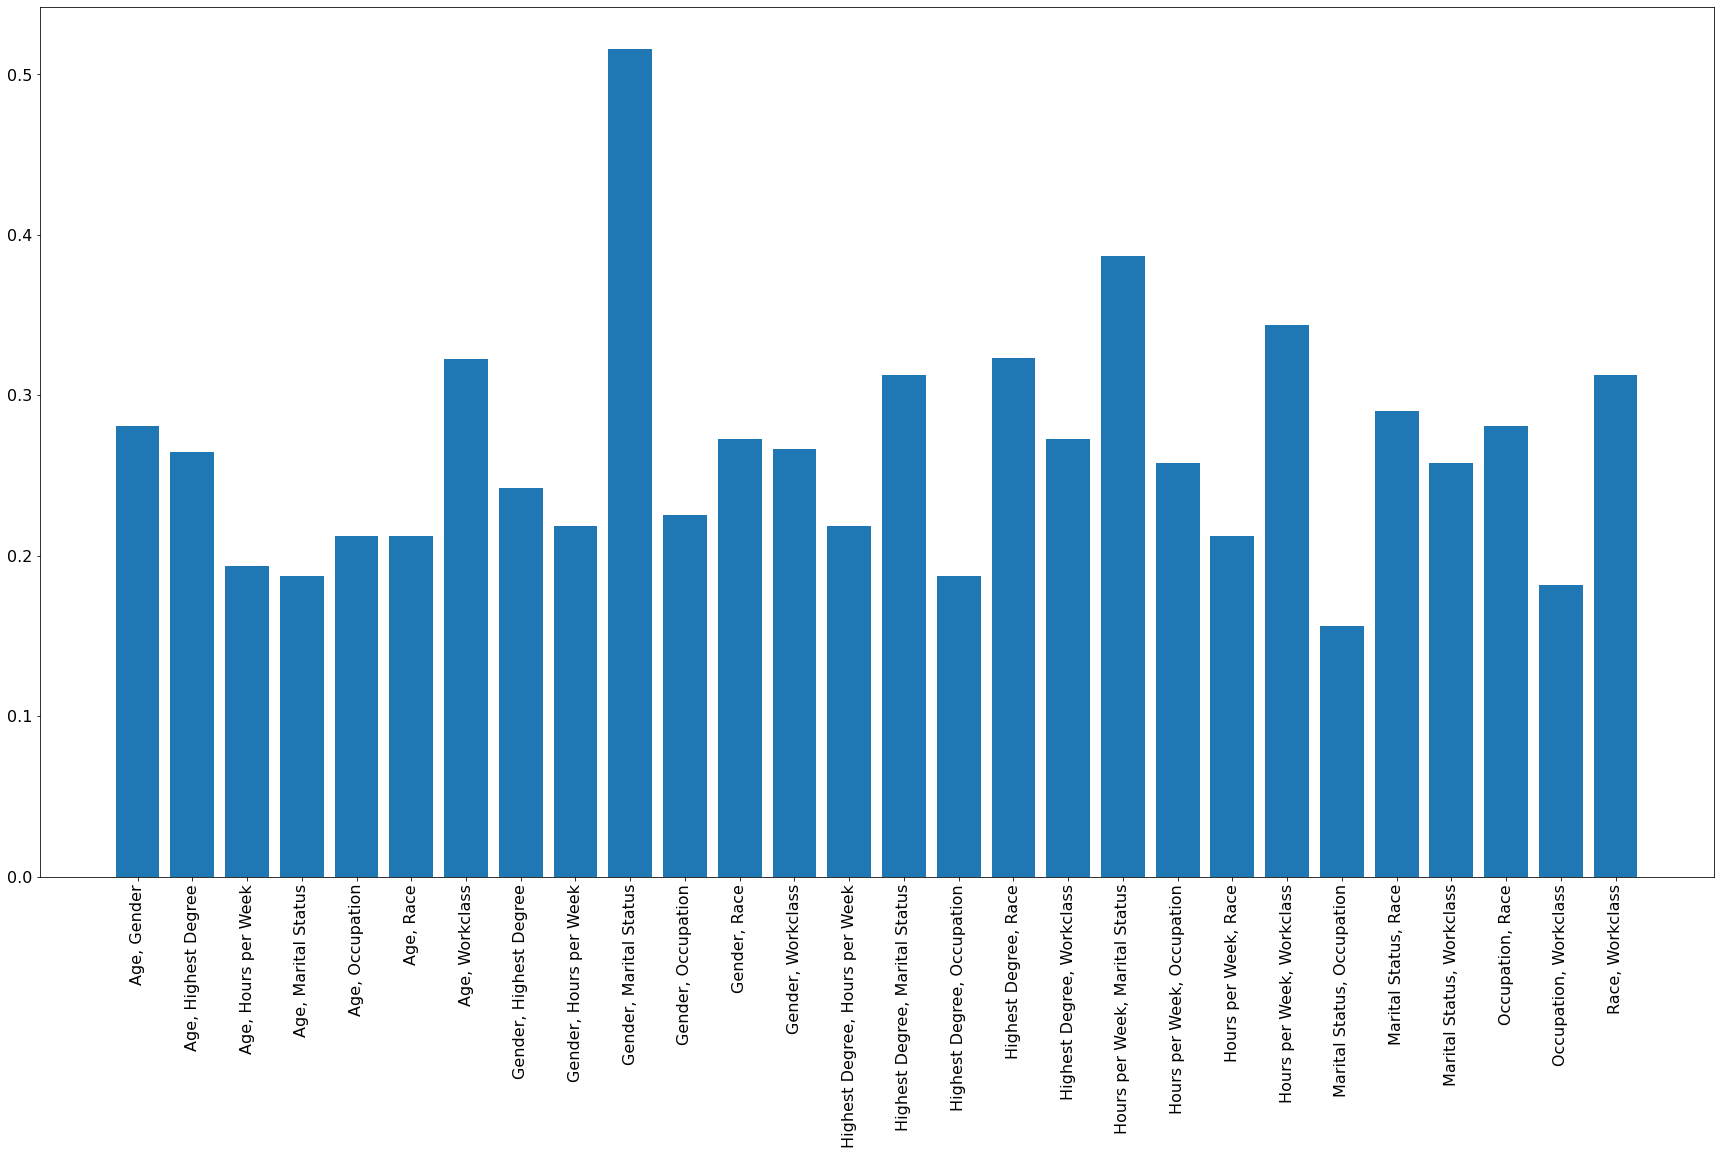

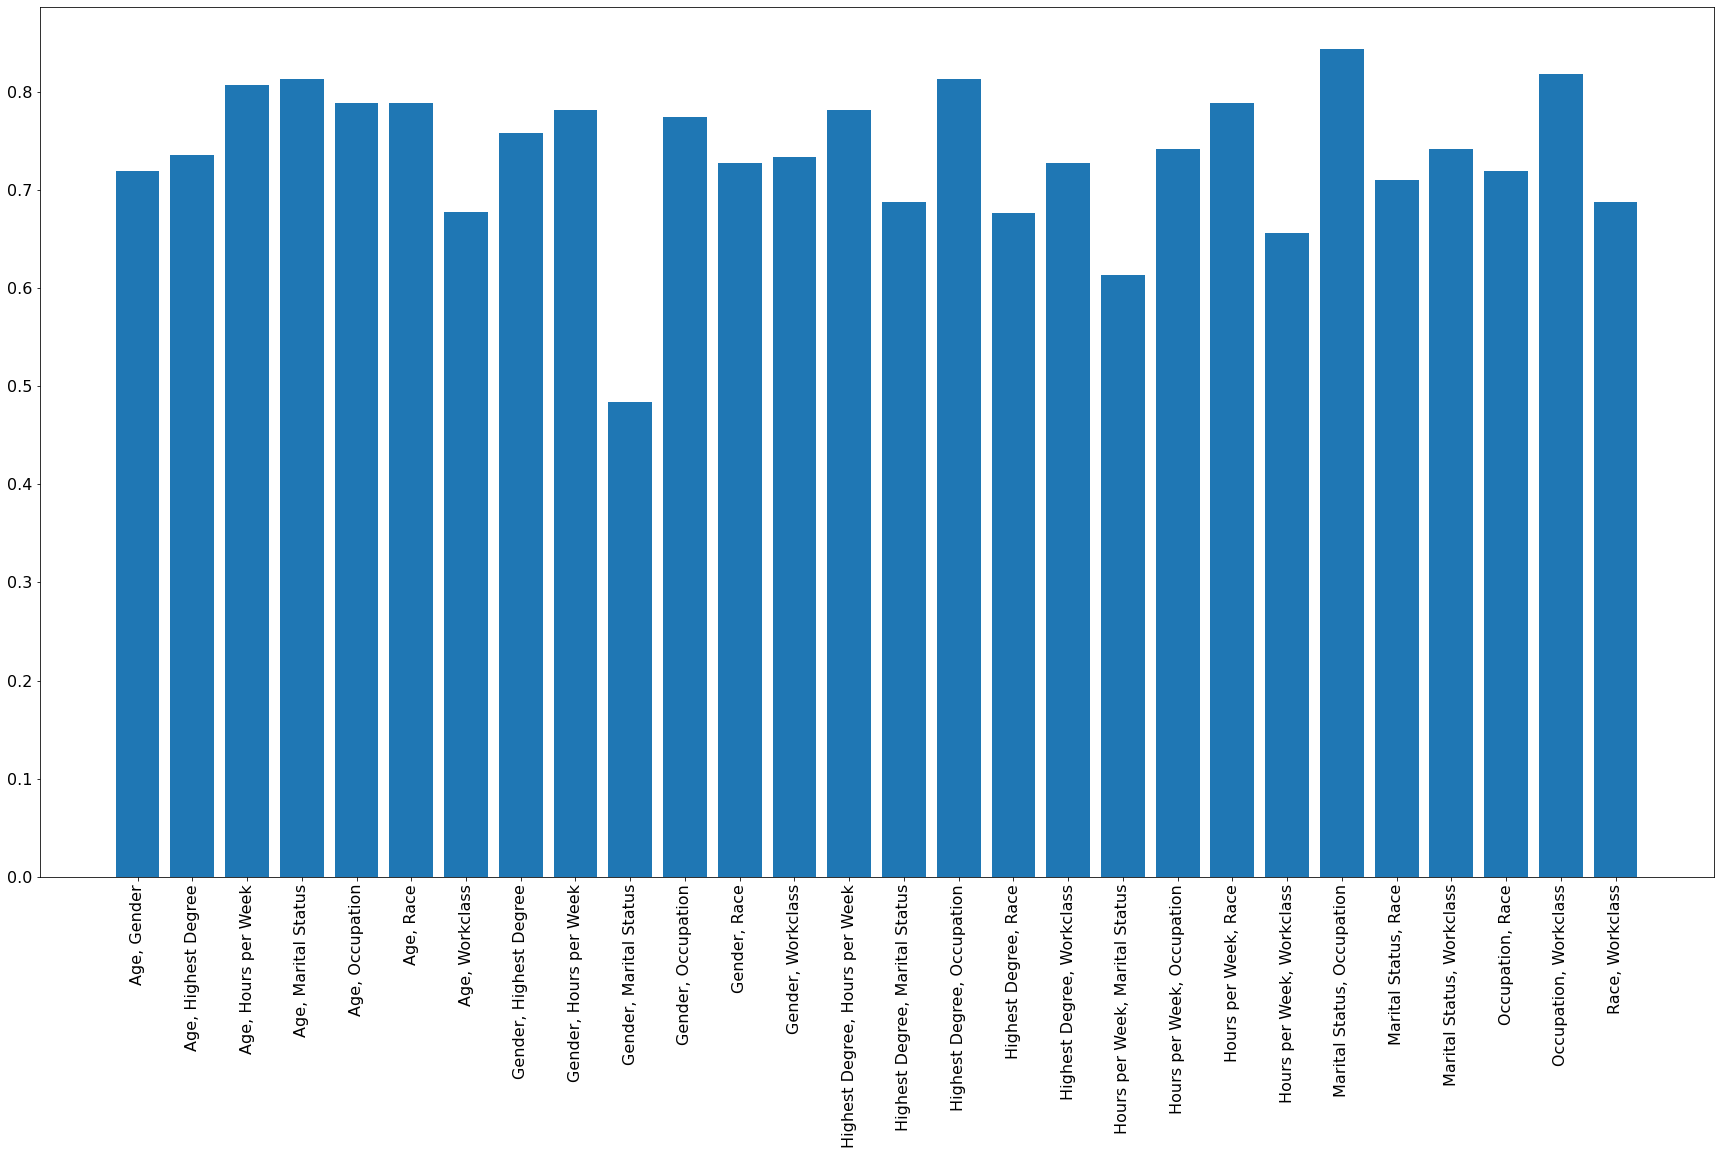

In [125]:
plt.figure(figsize=(30,16))
plt.bar(pr.keys(),pr.values())
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize=(30,16))
plt.bar(kr.keys(),kr.values())
plt.xticks(rotation = 90)
plt.show()

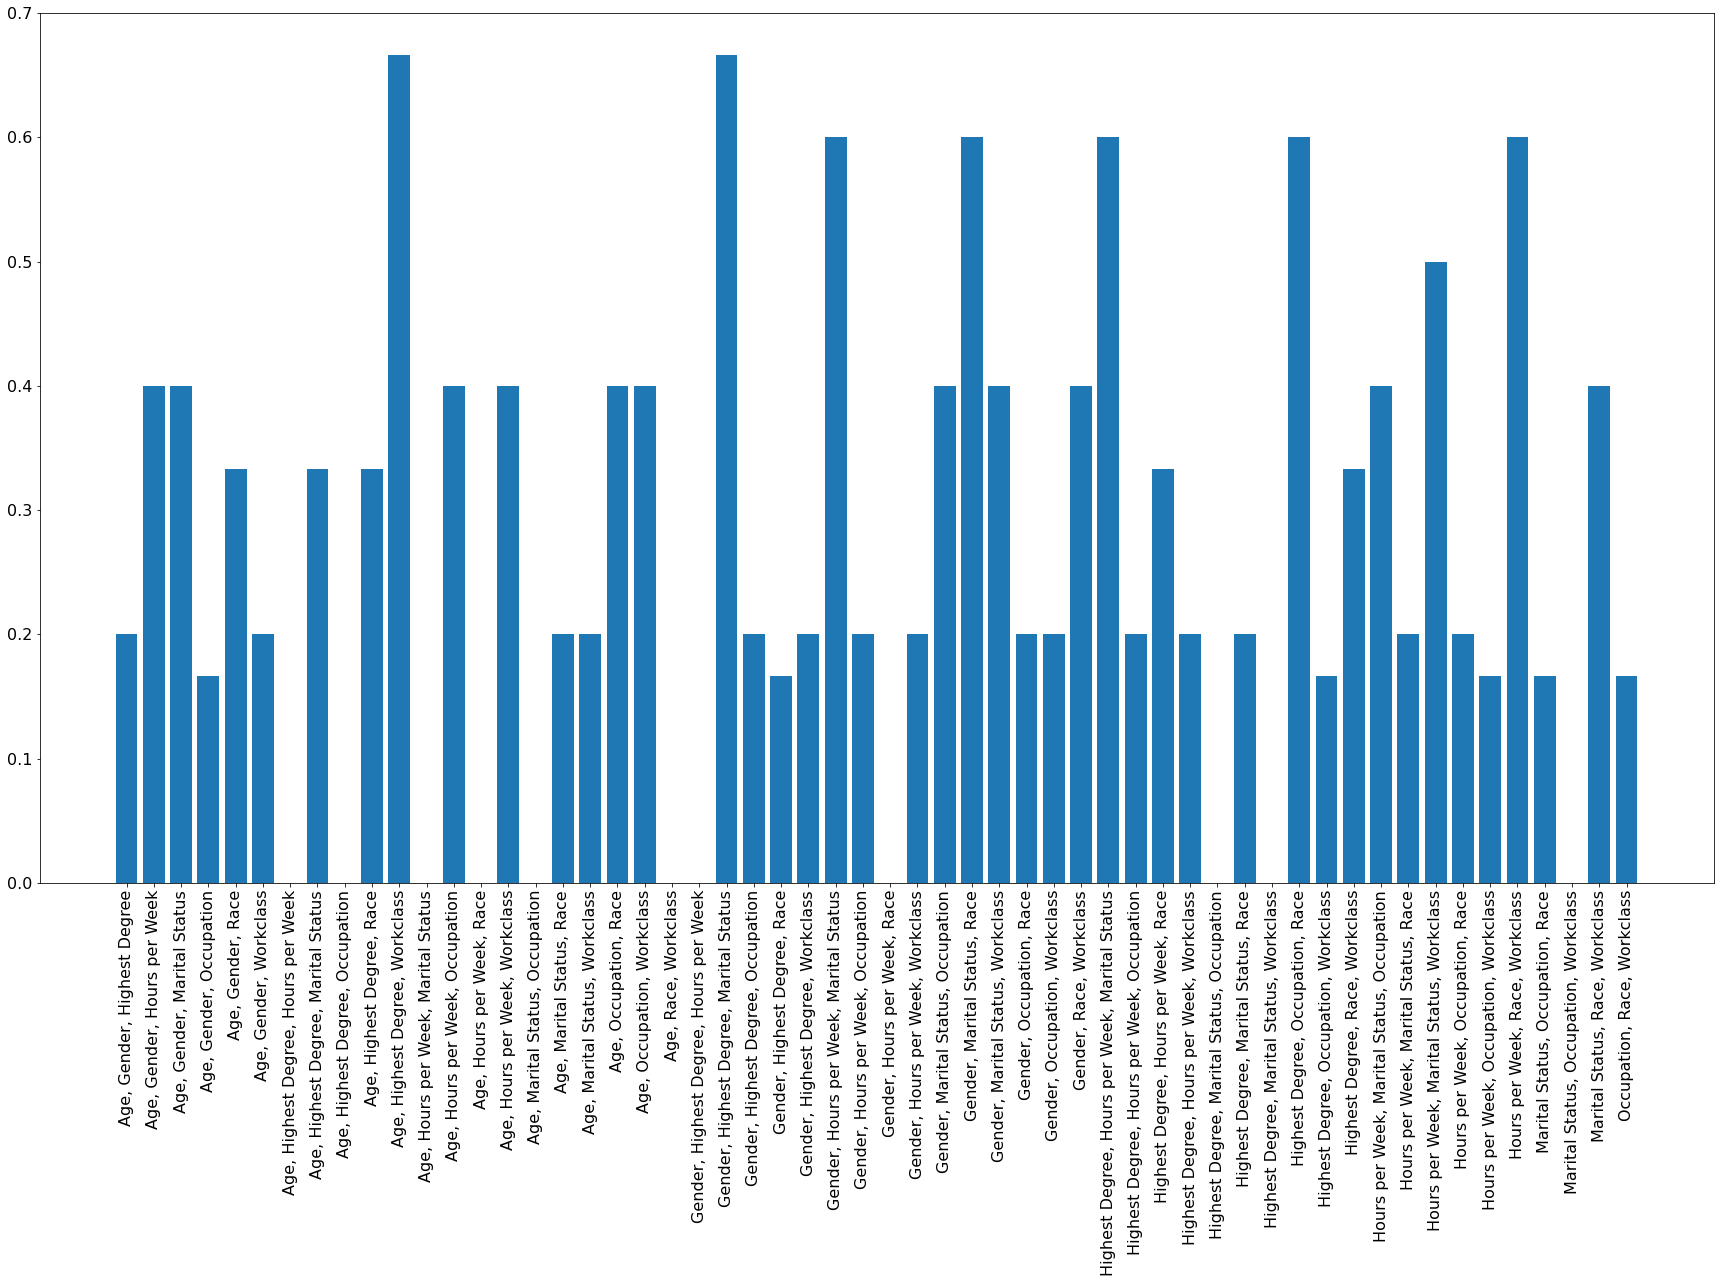

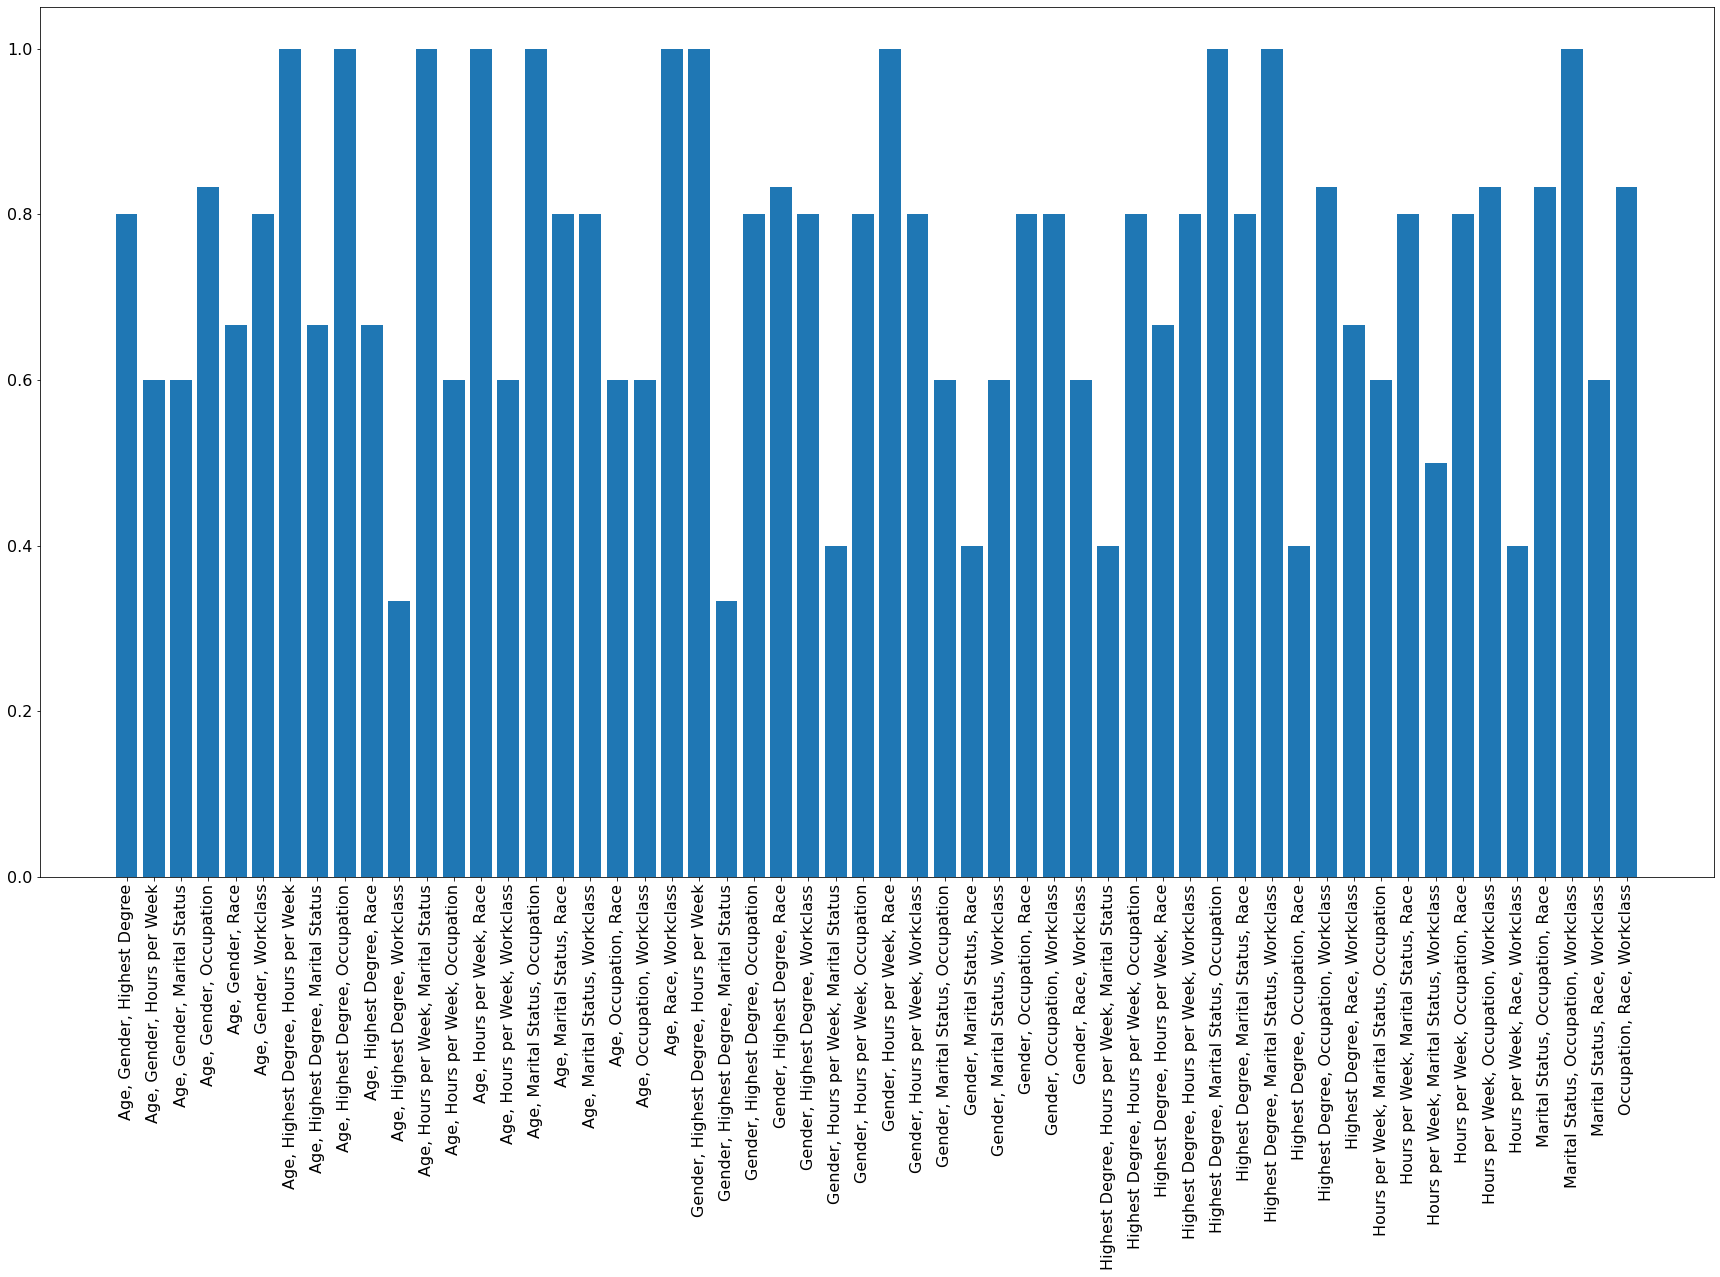

In [127]:
plt.figure(figsize=(30,16))
plt.bar(prfull.keys(),prfull.values())
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize=(30,16))
plt.bar(krfull.keys(),krfull.values())
plt.xticks(rotation = 90)
plt.show()

In [122]:
prfull

OrderedDict([('Age, Gender, Highest Degree', 0.2),
             ('Age, Gender, Hours per Week', 0.4),
             ('Age, Gender, Marital Status', 0.4),
             ('Age, Gender, Occupation', 0.16666666666666666),
             ('Age, Gender, Race', 0.3333333333333333),
             ('Age, Gender, Workclass', 0.2),
             ('Age, Highest Degree, Marital Status', 0.3333333333333333),
             ('Age, Highest Degree, Race', 0.3333333333333333),
             ('Age, Highest Degree, Workclass', 0.6666666666666666),
             ('Age, Hours per Week, Occupation', 0.4),
             ('Age, Hours per Week, Workclass', 0.4),
             ('Age, Marital Status, Race', 0.2),
             ('Age, Marital Status, Workclass', 0.2),
             ('Age, Occupation, Race', 0.4),
             ('Age, Occupation, Workclass', 0.4),
             ('Gender, Highest Degree, Marital Status', 0.6666666666666666),
             ('Gender, Highest Degree, Occupation', 0.2),
             ('Gender, Highest De

In [121]:
krfull

OrderedDict([('Age, Gender, Highest Degree', 0.8),
             ('Age, Gender, Hours per Week', 0.6),
             ('Age, Gender, Marital Status', 0.6),
             ('Age, Gender, Occupation', 0.8333333333333334),
             ('Age, Gender, Race', 0.6666666666666666),
             ('Age, Gender, Workclass', 0.8),
             ('Age, Highest Degree, Hours per Week', 5),
             ('Age, Highest Degree, Marital Status', 0.6666666666666666),
             ('Age, Highest Degree, Occupation', 6),
             ('Age, Highest Degree, Race', 0.6666666666666666),
             ('Age, Highest Degree, Workclass', 0.3333333333333333),
             ('Age, Hours per Week, Marital Status', 5),
             ('Age, Hours per Week, Occupation', 0.6),
             ('Age, Hours per Week, Race', 6),
             ('Age, Hours per Week, Workclass', 0.6),
             ('Age, Marital Status, Occupation', 6),
             ('Age, Marital Status, Race', 0.8),
             ('Age, Marital Status, Workclass', 0.8

In [131]:
df['Model Response'].sum()/len(df['Model Response'])

0.24749163879598662